**Image Augmentations**

In [1]:
import torch
import torch.nn as nn
from torchvision import datasets
import matplotlib.pyplot as plt
import imgaug.augmenters as iaa
import numpy as np
from torch.utils.data import Dataset, dataloader

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

def to_numpy(tensor):
  return tensor.cpu().detach().numpy()

In [3]:
data_folder = '/content'
fmnist = datasets.FashionMNIST(data_folder, download=True, train=True)

100%|██████████| 26421880/26421880 [00:02<00:00, 12460660.02it/s]


Extracting /content/FashionMNIST/raw/train-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 200822.27it/s]


Extracting /content/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3707279.93it/s]


Extracting /content/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /content/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 10605244.10it/s]

Extracting /content/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /content/FashionMNIST/raw



**Fetch an image from the downloaded dataset**

In [4]:
tr_images = fmnist.data
tr_targets = fmnist.targets

**Plot the first image**

Text(0.5, 1.0, 'Original Image')

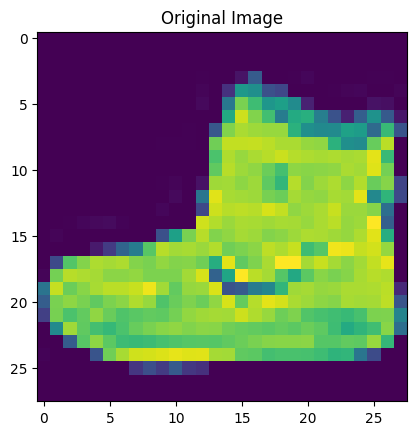

In [5]:
plt.imshow(tr_images[0])
plt.title('Original Image')

**Define an object that perform scaling**

In [6]:
aug = iaa.Affine(scale=2)


Text(0.5, 1.0, 'Scaled Image')

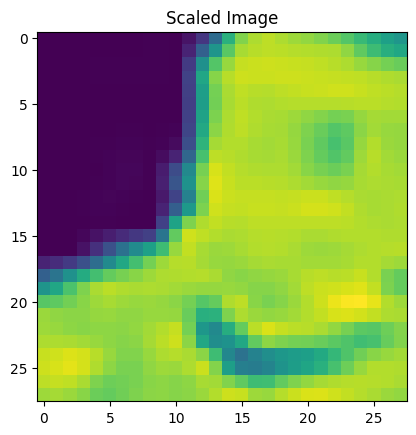

In [7]:
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled Image')

Text(0.5, 1.0, 'Translated image by 10 pixels')

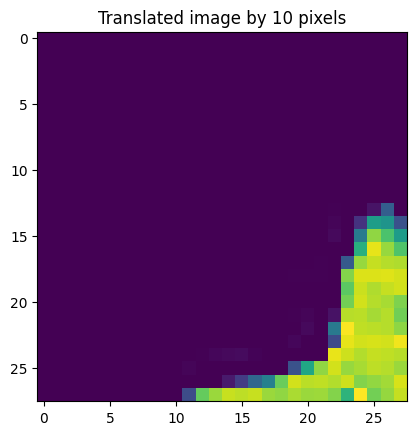

In [8]:
aug = iaa.Affine(translate_px=10)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Translated image by 10 pixels')

Text(0.5, 1.0, 'Translation of 10 pixels \nacross columns and 2 pixel over rows')

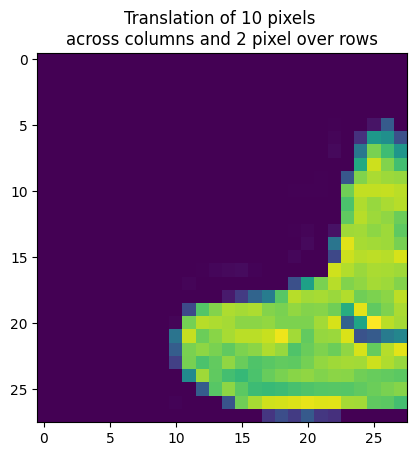

In [9]:
aug = iaa.Affine(translate_px = {'x': 10, 'y':2})
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Translation of 10 pixels \nacross columns and 2 pixel over rows')

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

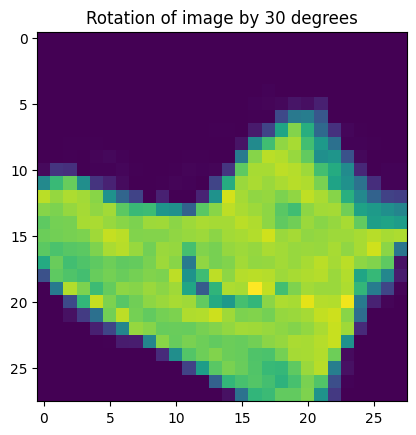

In [10]:
aug = iaa.Affine(rotate=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by 30 degrees')

Text(0.5, 1.0, 'Rotation of image by -30 degrees')

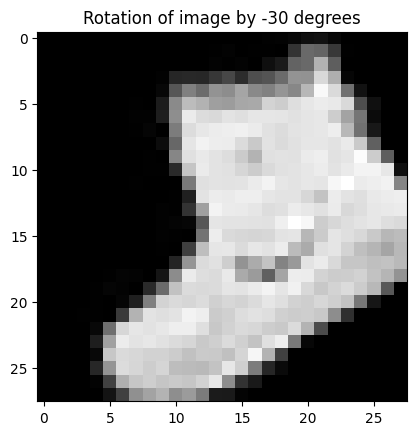

In [11]:
aug = iaa.Affine(rotate=-30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray')
plt.title('Rotation of image by -30 degrees')

Text(0.5, 1.0, 'Shear of image by 30 degrees')

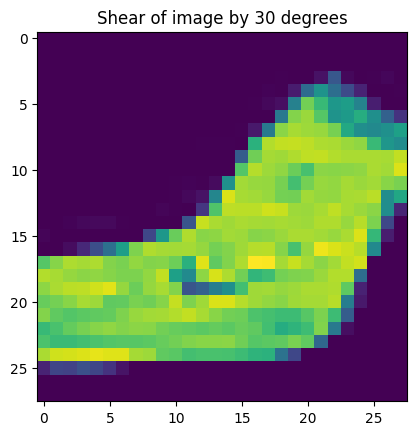

In [12]:
aug = iaa.Affine(shear=30)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Shear of image by 30 degrees')

Text(0.5, 1.0, 'Shear of image \nby 30 degrees')

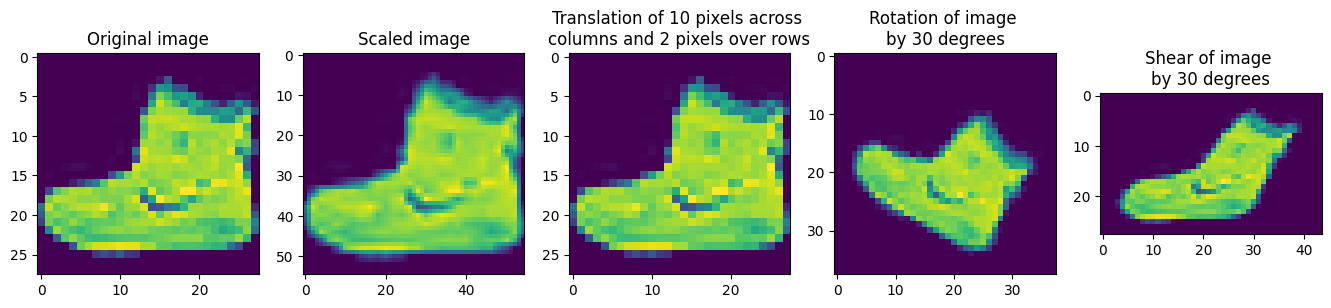

In [14]:
plt.figure(figsize=(20,20))
plt.subplot(161)
plt.imshow(tr_images[0])
plt.title('Original image')
plt.subplot(162)
aug = iaa.Affine(scale=2, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Scaled image')
plt.subplot(163)
aug = iaa.Affine(translate_px={'x':10,'y':2}, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Translation of 10 pixels across \ncolumns and 2 pixels over rows')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image \nby 30 degrees')
plt.subplot(165)
aug = iaa.Affine(shear=30, fit_output=True)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Shear of image \nby 30 degrees')

The size of the augmented image increased to account for the augmented image not being cropped
(in the scaled image's output or when rotating the image by 30 degrees).

Text(0.5, 1.0, 'Rotation of image by 30 degrees')

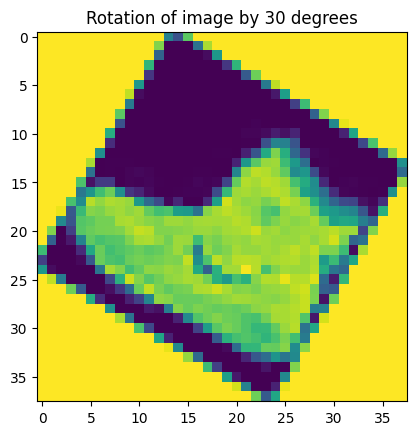

In [16]:
aug = iaa.Affine(rotate=30, fit_output=True, cval=255)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by 30 degrees')

Different modes to to fill the values of newly created pixels

Text(0.5, 1.0, 'Rotation of image by \n30 degrees with wrap mode')

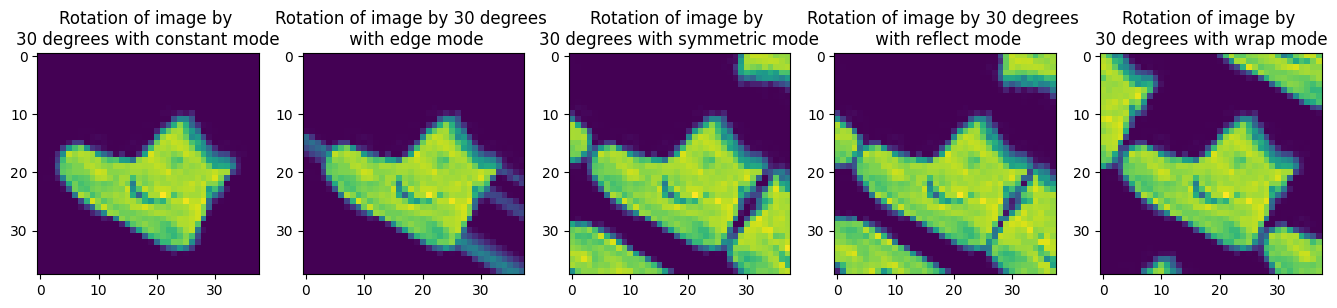

In [17]:
plt.figure(figsize=(20,20))
plt.subplot(161)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by \n30 degrees with constant mode')
plt.subplot(162)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='edge')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by 30 degrees \n with edge mode')
plt.subplot(163)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='symmetric')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by \n30 degrees with symmetric mode')
plt.subplot(164)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='reflect')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by 30 degrees \n with reflect mode')
plt.subplot(165)
aug = iaa.Affine(rotate=30, fit_output=True, cval=0, mode='wrap')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.title('Rotation of image by \n30 degrees with wrap mode')

Rotation angle - Range that the image will be rotated by:

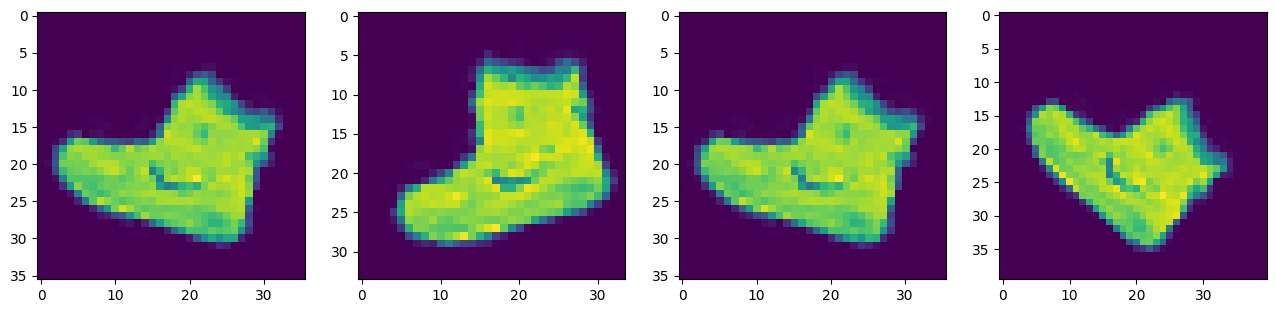

In [18]:
plt.figure(figsize=(20,20))
plt.subplot(151)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.subplot(152)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.subplot(153)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))
plt.subplot(154)
aug = iaa.Affine(rotate=(-45,45), fit_output=True, cval=0, mode='constant')
plt.imshow(aug.augment_image(to_numpy(tr_images[0])))

**Changing the Brightness**

Multiply and Linearcontrast are two different augmentation techniques that can
be leveraged

Text(0.5, 1.0, 'Pixels multiplied by 1')

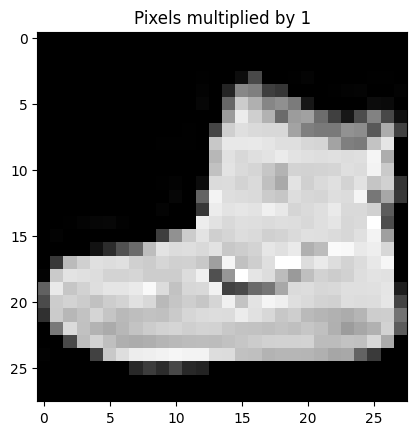

In [23]:
aug = iaa.Multiply(1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 1')

Text(0.5, 1.0, 'Pixels multiplied by 0.5')

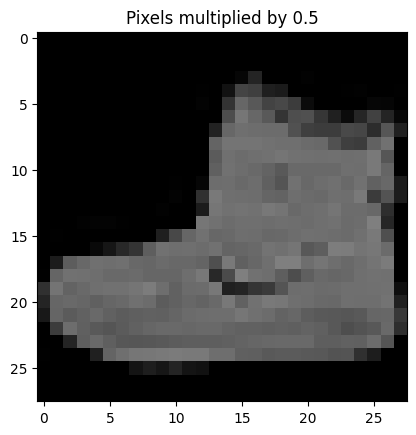

In [22]:
aug = iaa.Multiply(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Pixels multiplied by 0.5')

Text(0.5, 1.0, 'Pixel contrast by 0.5')

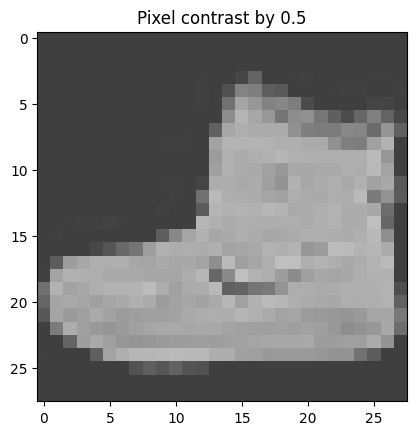

In [25]:
aug = iaa.LinearContrast(0.5)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin=0, vmax=255)
plt.title('Pixel contrast by 0.5')

**Adding Noise**

Dropout and SaltAndPepper are two prominent methods that can help
in simulating grainy image conditions.

Text(0.5, 1.0, 'Random 20 % pixel dropout')

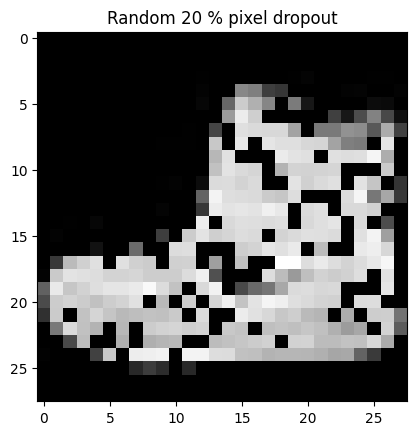

In [26]:
aug = iaa.Dropout(p=0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Random 20 % pixel dropout')

Text(0.5, 1.0, 'Random 20 % salt and Pepper')

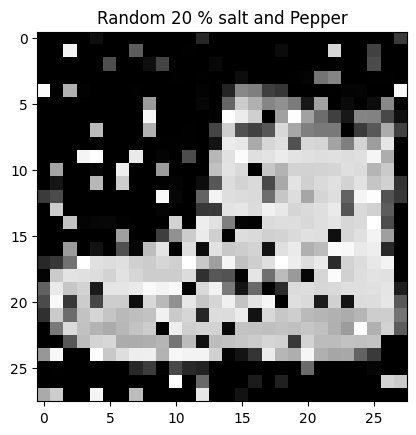

In [27]:
aug = iaa.SaltAndPepper(0.2)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax= 255)
plt.title('Random 20 % salt and Pepper')

**Performing a sequence of image augmentation**

In [28]:
seq = iaa.Sequential([
    iaa.Dropout(p=0.2),
    iaa.Affine(rotate=(-30, 30))
], random_order = True)

Text(0.5, 1.0, 'Image augmented using \nrandom order of the two augmentations')

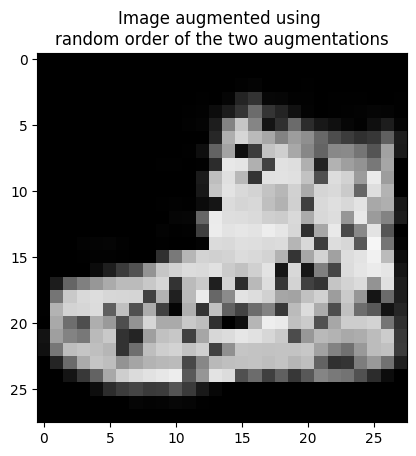

In [29]:
plt.imshow(seq.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title("Image augmented using \nrandom order of the two augmentations")

**Blur**

Text(0.5, 1.0, 'Gaussian Blurring of image \n with a sigma of 1')

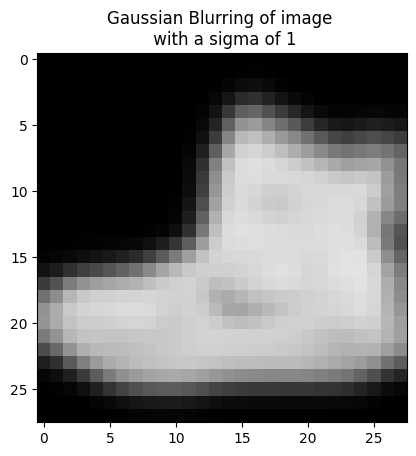

In [30]:
aug = iaa.GaussianBlur(sigma=1)
plt.imshow(aug.augment_image(to_numpy(tr_images[0])), cmap='gray', vmin = 0, vmax = 255)
plt.title('Gaussian Blurring of image \n with a sigma of 1')

**Performing data augmentation on a batch of
images**

In [31]:
aug = iaa.Sequential([
              iaa.Affine(translate_px={'x':(-10,10)}, mode='constant'),
            ])

Scenario 1: Augmenting 32 images, one at a time:

In [34]:
%time
for i in range(32):
  aug.augment_image(to_numpy(tr_images[i]))

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 6.44 µs


Scenario 2: Augmenting 32 images as a batch in one go

In [36]:
%time
x = aug.augment_images(to_numpy(tr_images[i]))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs
